# Unit Testing Bayeschangepoint Detection

In [1]:
import writefile_run as writefile_run

In [2]:
% matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
%%writefile_run unit_test_bayes_sprint1.py 

import pandas as pd
import numpy as np
import os
# importing the bayesian changepoint main python file to detect changepoints
import bayeschangept_sprint1 as bayeschangept
import warnings
warnings.filterwarnings('ignore')

Use scipy logsumexp().


In [4]:
%%writefile_run unit_test_bayes_sprint1.py -a


assetno = ['1']
con = '52.173.76.89:4242'
src_type =  'opentsdb'
param = ['FE-001.DRIVEENERGY']
from_timestamp = 1520402214
to_timestamp = 1520407294

In [5]:
kwargs = lambda :{
            'assetno':assetno,
            'from_timestamp':from_timestamp,
            'to_timestamp':to_timestamp,
            'con':con,
            'para_list':param,
            'source_type':src_type,
            'table_name':'',
            'qry_str':'',
            'impute_fill_method':'forward',
            'down_sampling_method':None,
            'down_sampling_window':None,
            'freq':None,
            'resample_fill_method':None,
            'to_resample':None,
            'to_impute':True,
            'thres_prob':0.5,
            'samples_to_wait':10,
            'expected_run_length':100
        }

In [6]:
def preparecsvtoread(filepath,filename,target_dir,assetno='1',n_rows=None,has_time=True):
    if(n_rows is not None):
        df  = pd.read_csv(filepath,nrows=n_rows)
    else:
        df = pd.read_csv(filepath)
    df['assetno'] = assetno
    if(has_time!=True):
        start = pd.Timestamp("19700807 08:30-0400")
        end = pd.Timestamp("20170807 17:30-0400")
        index = pd.DatetimeIndex(start=start, end=end, freq="10min")[:n_rows]
        df.insert(0,'timestamp', index) 
        df = df.dropna(axis=1, how='all')
        print(df.head())
    else:
        df = df.rename(columns={df.columns[0]:'timestamp'})
    df['timestamp'] = (pd.to_datetime(df['timestamp'],infer_datetime_format=True).astype(np.int64)/(1e6)).astype(np.int64)
    metric_names = df.columns[1:-1]
    target_filepath = os.path.join(target_dir,filename)
    df.to_csv(target_filepath,index=False)
    return target_filepath,list(metric_names)

In [7]:
def get_csv_kwargs(infile='./dataset/sample_csv_files/alcohol-demand-log-spirits-consu.csv',
                  filename='alcohol-demand-log-spirits-consu.csv',
                  target_dir='dataset/reader_csv_files/',assetno = ['1'],n_rows=None,has_time=True):
    kwargs1 = kwargs()
    
    con,param = preparecsvtoread(filepath=infile,filename=filename,target_dir=target_dir,assetno=assetno[0],
                                 n_rows=n_rows,has_time=has_time)
    kwargs1['con'] = con
    kwargs1['source_type'] = 'csv'
    kwargs1['from_timestamp']=-int(2**63)
    kwargs1['to_timestamp']=int(2**63)
    kwargs1['para_list'] = param
    
    return kwargs1

In [8]:
keys = ['thres_prob','samples_to_wait','expected_run_length']

## Test 1 : 
#### Testing with parameters being empty quotes

In [9]:
%%writefile_run unit_test_bayes_sprint1.py -a

kwargs1 = kwargs()
for key in keys:
    kwargs1[key]=''
    res = bayeschangept.call(**kwargs1)
    print(res)

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'float'>", 'data': {'argument': 'pthres', 'value': ''}}
{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'float'>", 'data': {'argument': 'pthres', 'value': ''}}
{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'float'>", 'data': {'argument': 'pthres', 'value': ''}}


## Test 2 :
#### Testing missing parameters : 

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : FE-001.DRIVEENERGY
 
Shape of the dataset : 
(508, 2)
Overview of first five rows of dataset : 


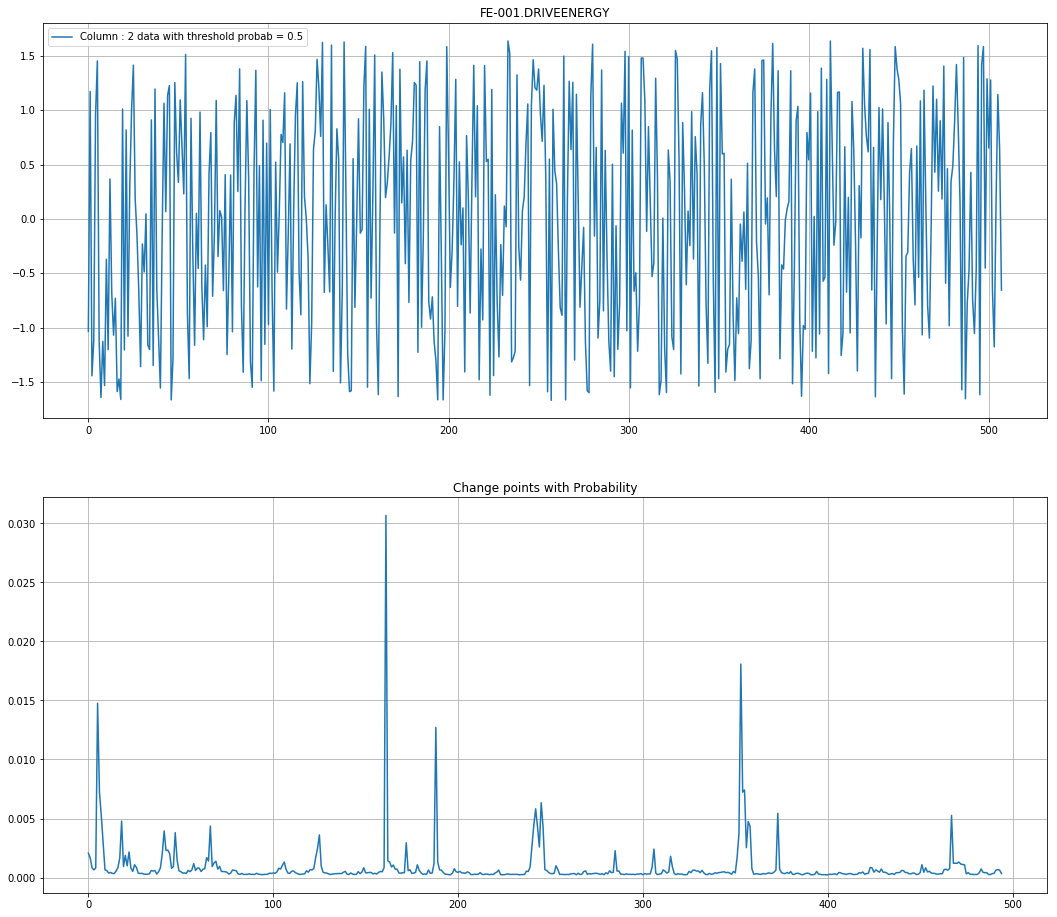


 No of Anomalies detected = 0
Postgres writer initialised 


No anomaly detected to write

{'code': '200', 'status': 'OK'}
Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : FE-001.DRIVEENERGY
 
Shape of the dataset : 
(508, 2)
Overview of first five rows of dataset : 


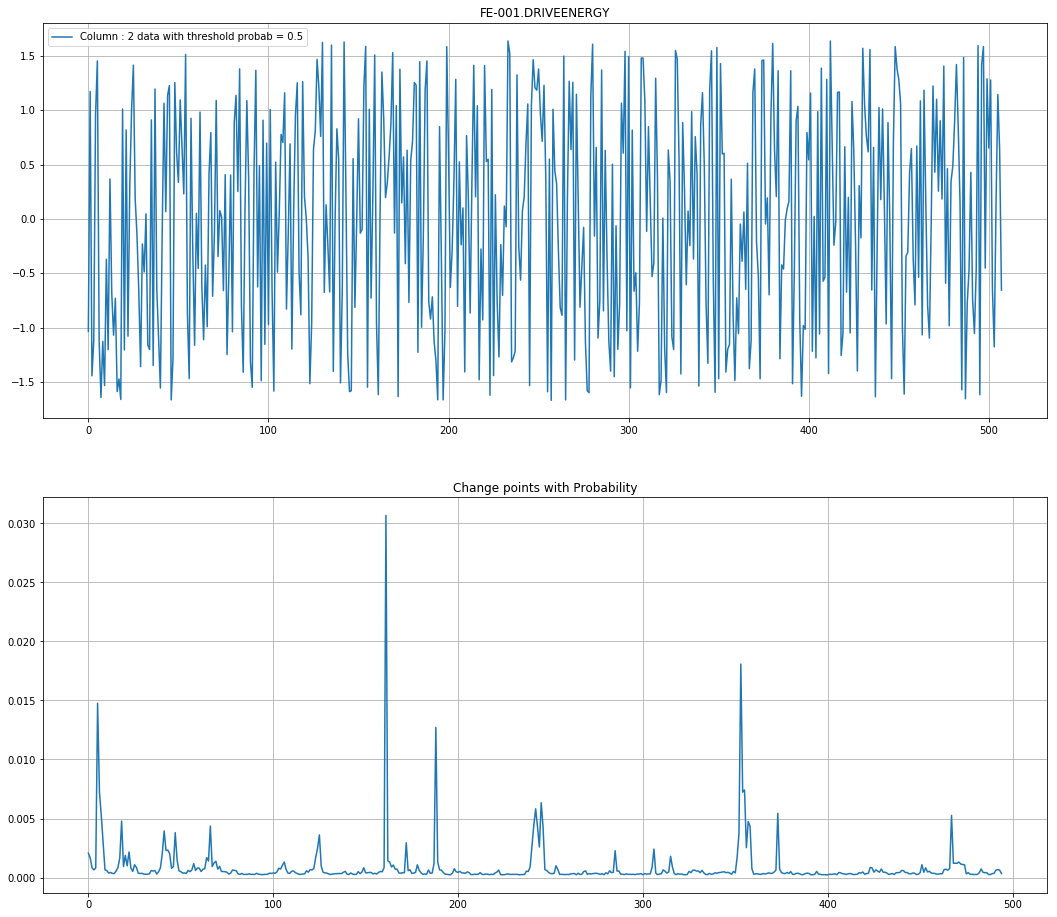


 No of Anomalies detected = 0
Postgres writer initialised 


No anomaly detected to write

{'code': '200', 'status': 'OK'}
Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : FE-001.DRIVEENERGY
 
Shape of the dataset : 
(508, 2)
Overview of first five rows of dataset : 


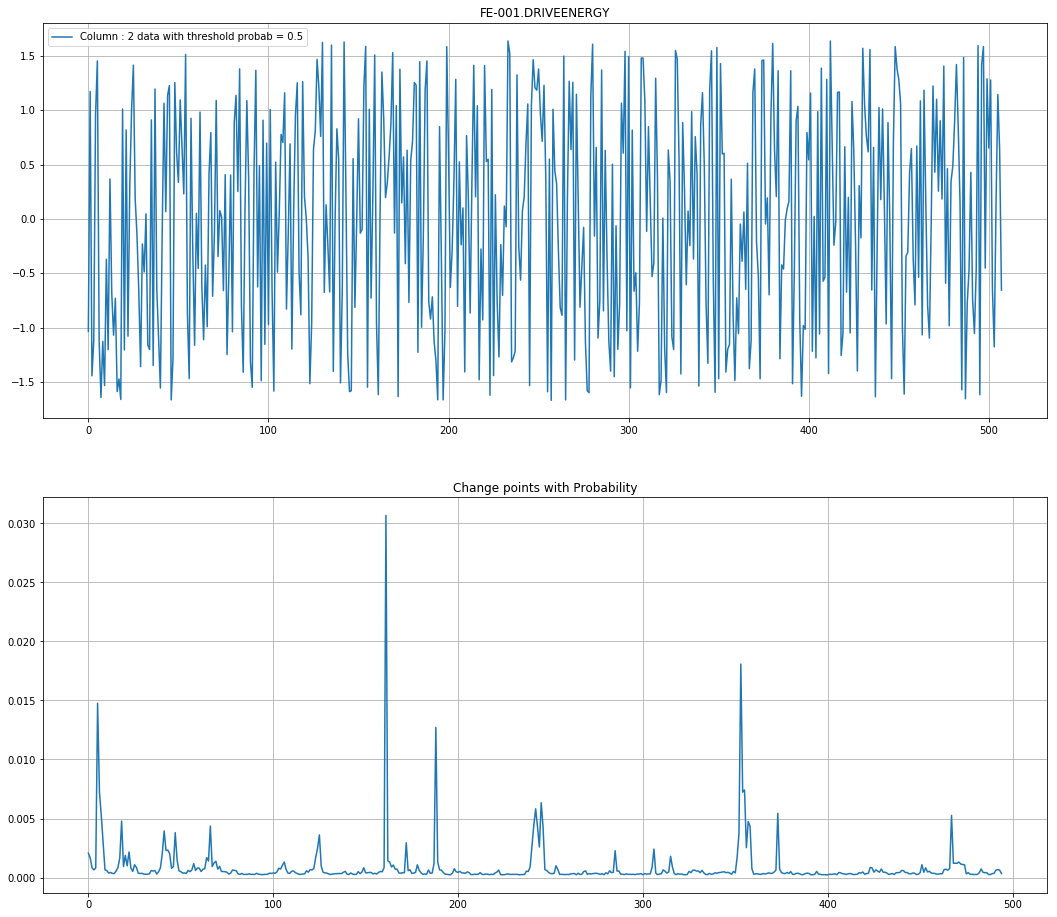


 No of Anomalies detected = 0
Postgres writer initialised 


No anomaly detected to write

{'code': '200', 'status': 'OK'}


In [10]:
%%writefile_run unit_test_bayes_sprint1.py -a


kwargs1 = kwargs()
for key in keys:
    del kwargs1[key]
    res = bayeschangept.call(**kwargs1)
    print(res)

## Test 3:
#### Testing parameter type mismatch 

In [11]:
keys

['thres_prob', 'samples_to_wait', 'expected_run_length']

In [12]:
%%writefile_run unit_test_bayes_sprint1.py -a

kwargs1 = kwargs()
val = ['2',4.5,'def']
for i,key in enumerate(keys):
    kwargs1[key]=val[i]
    res = bayeschangept.call(**kwargs1)
    print(res)

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'float'>", 'data': {'argument': 'pthres', 'value': '2'}}
{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'float'>", 'data': {'argument': 'pthres', 'value': '2'}}
{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'float'>", 'data': {'argument': 'pthres', 'value': '2'}}


### User Defined Test Case:
#### Testing the fact that probability threshold must be between 0 and 1

In [13]:
kwargs1 = kwargs()
val = [5,4,100]
for i,key in enumerate(keys):
    kwargs1[key]=val[i]
    res = bayeschangept.call(**kwargs1)
    print(res)

{'code': '400', 'status': 'Bad Request', 'message': 'probability must be between 0 and 1 and it must be of type int or float', 'data': {'argument': 'pthres', 'value': 5}}
{'code': '400', 'status': 'Bad Request', 'message': 'probability must be between 0 and 1 and it must be of type int or float', 'data': {'argument': 'pthres', 'value': 5}}
{'code': '400', 'status': 'Bad Request', 'message': 'probability must be between 0 and 1 and it must be of type int or float', 'data': {'argument': 'pthres', 'value': 5}}


## Test 4:
#### Testing Algorithm Logic :
* Running the algorithm for different values of probability thresholds
* so expected o/p behaviour expected is as we increase the probability threshold the no of anomaly detected reduces and reaches zero when set to $1.0$
* Default threshold is $0.5$

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)
Overview of first five rows of dataset : 


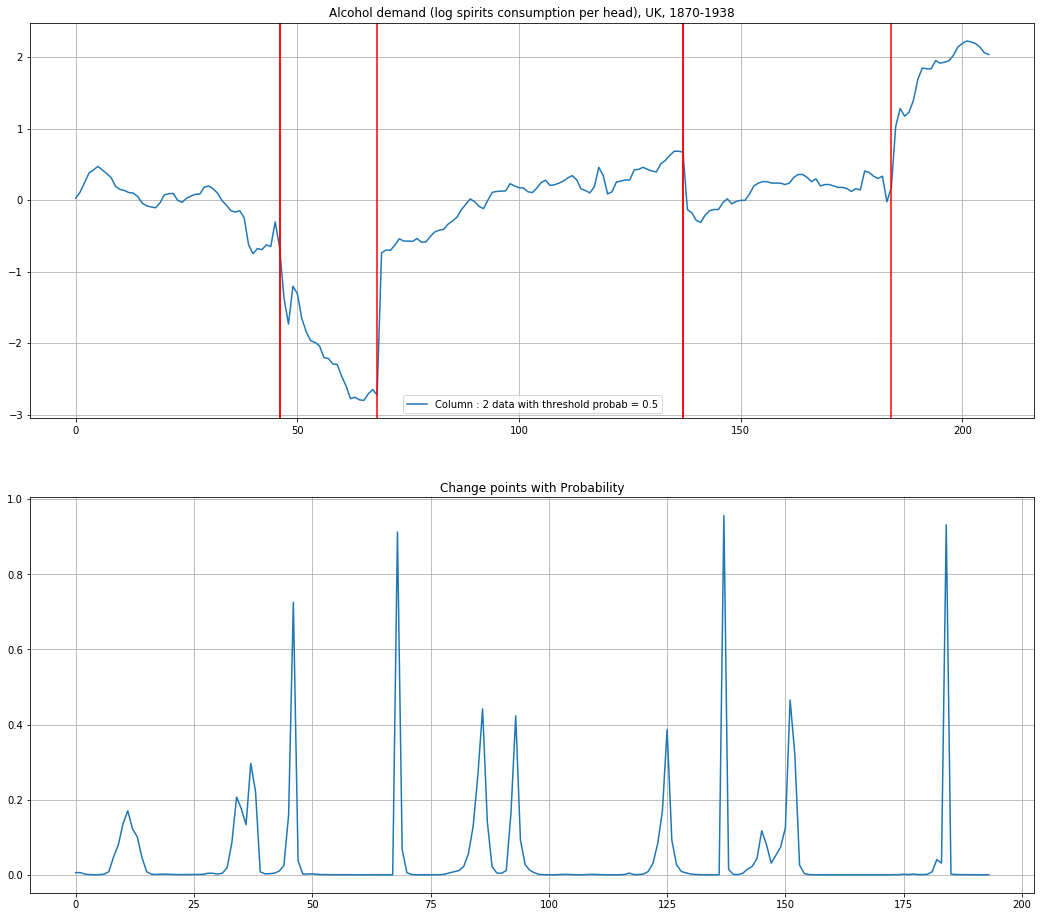


 No of Anomalies detected = 6
Postgres writer initialised 


 Successfully written into database

{'code': '200', 'status': 'OK'}
{'code': '400', 'status': 'Bad Request', 'message': 'probability must be between 0 and 1 and it must be of type int or float', 'data': {'argument': 'pthres', 'value': 0.0}}
{'code': '400', 'status': 'Bad Request', 'message': 'probability must be between 0 and 1 and it must be of type int or float', 'data': {'argument': 'pthres', 'value': 1.0}}


In [14]:
%%writefile_run unit_test_bayes_sprint1.py -a

kwargs1 = get_csv_kwargs()
pthreses = [0.5,0.0,1.0]
for i,pthres in enumerate(pthreses):
    kwargs1['thres_prob']=pthres
    res = bayeschangept.call(**kwargs1)
    print(res)

#### Observe the effect of expected_run_length on the algorithm


 Anomaly detection for expected run length  = 0

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)
Overview of first five rows of dataset : 
{'code': '500', 'status': 'Unknown Exception', 'message': ZeroDivisionError('division by zero',)}

 Anomaly detection for expected run length  = 100

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)
Overview of first five rows of dataset : 


Traceback (most recent call last):
  File "C:\Users\tr1109\intrototimeseries\tsfad\rohithram\rohithram-bayes-changept\Bayesion_changept\bayeschangept_sprint1.py", line 136, in call
    data,anom_indexes = anomaly_detector.detect_anomalies()
  File "C:\Users\tr1109\intrototimeseries\tsfad\rohithram\rohithram-bayes-changept\Bayesion_changept\bayesian_changept_detector.py", line 63, in detect_anomalies
    R,maxes = self.findonchangepoint(data[data.columns[ncol]].values)
  File "C:\Users\tr1109\intrototimeseries\tsfad\rohithram\rohithram-bayes-changept\Bayesion_changept\bayesian_changept_detector.py", line 77, in findonchangepoint
    oncd.StudentT(0.1, .01, 1, 0))
  File "C:\Users\tr1109\AppData\Local\Continuum\anaconda3\lib\site-packages\bayesian_changepoint_detection\online_changepoint_detection.py", line 17, in online_changepoint_detection
    H = hazard_func(np.array(range(t+1)))
  File "C:\Users\tr1109\AppData\Local\Continuum\anaconda3\lib\site-packages\bayesian_changepoint_detectio

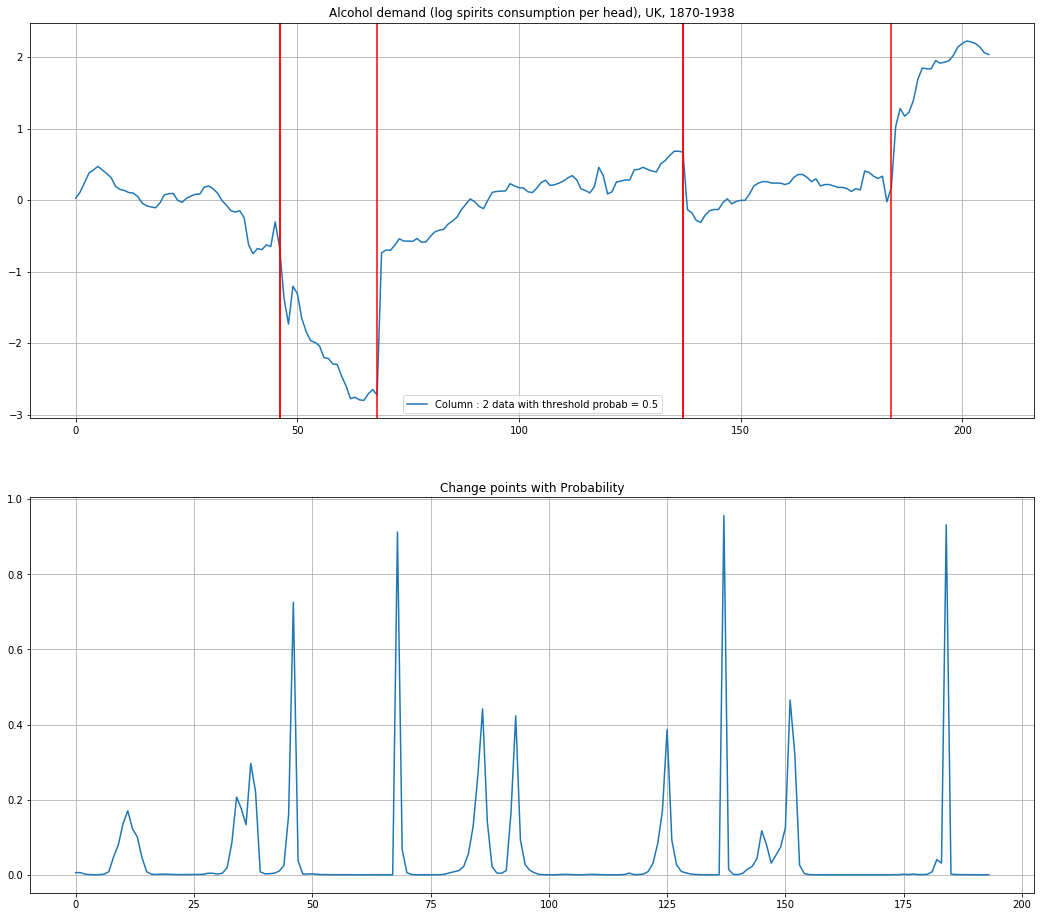


 No of Anomalies detected = 6
Postgres writer initialised 


 Successfully written into database

{'code': '200', 'status': 'OK'}

 Anomaly detection for expected run length  = 10000

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)
Overview of first five rows of dataset : 


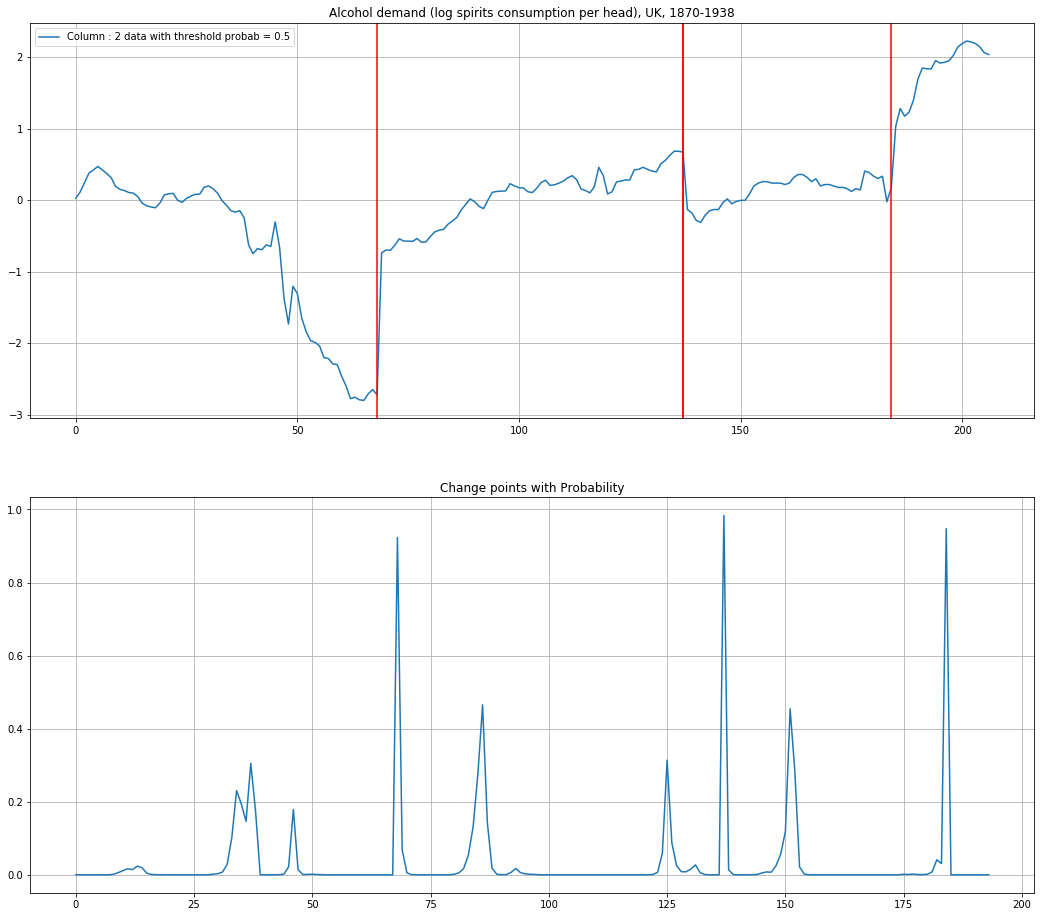


 No of Anomalies detected = 4
Postgres writer initialised 


 Successfully written into database

{'code': '200', 'status': 'OK'}


In [15]:
kwargs1['thres_prob'] = 0.5
mean_run_lens = [0,100,10000]
for i,mean_run_len in enumerate(mean_run_lens):
    print('\n Anomaly detection for expected run length  = {}\n'.format(mean_run_len))
    kwargs1['expected_run_length']=mean_run_len
    res = bayeschangept.call(**kwargs1)
    print(res)

##### Results:
* As we observed that when expected run length given zero. the algo stops and throws an zero division error as expected/
* Then as we increase it from zero, we observed that interval between changepoints increased

## Test 5:
#### Testing Algorithm tuning :
* Trying to change the parameters of algorithm and observe the results obtained
* Here we try to tune the algo to run faster and as we observe that on increasing expected run length, the sensitivity of detecting changepoints decreases which we saw above case too.

                  timestamp      0 assetno
0 1970-08-07 08:30:00-04:00  0.032       1
1 1970-08-07 08:40:00-04:00 -0.071       1
2 1970-08-07 08:50:00-04:00 -0.132       1
3 1970-08-07 09:00:00-04:00 -0.129       1
4 1970-08-07 09:10:00-04:00  0.022       1
Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : 0
 
Shape of the dataset : 
(5000, 2)
Overview of first five rows of dataset : 


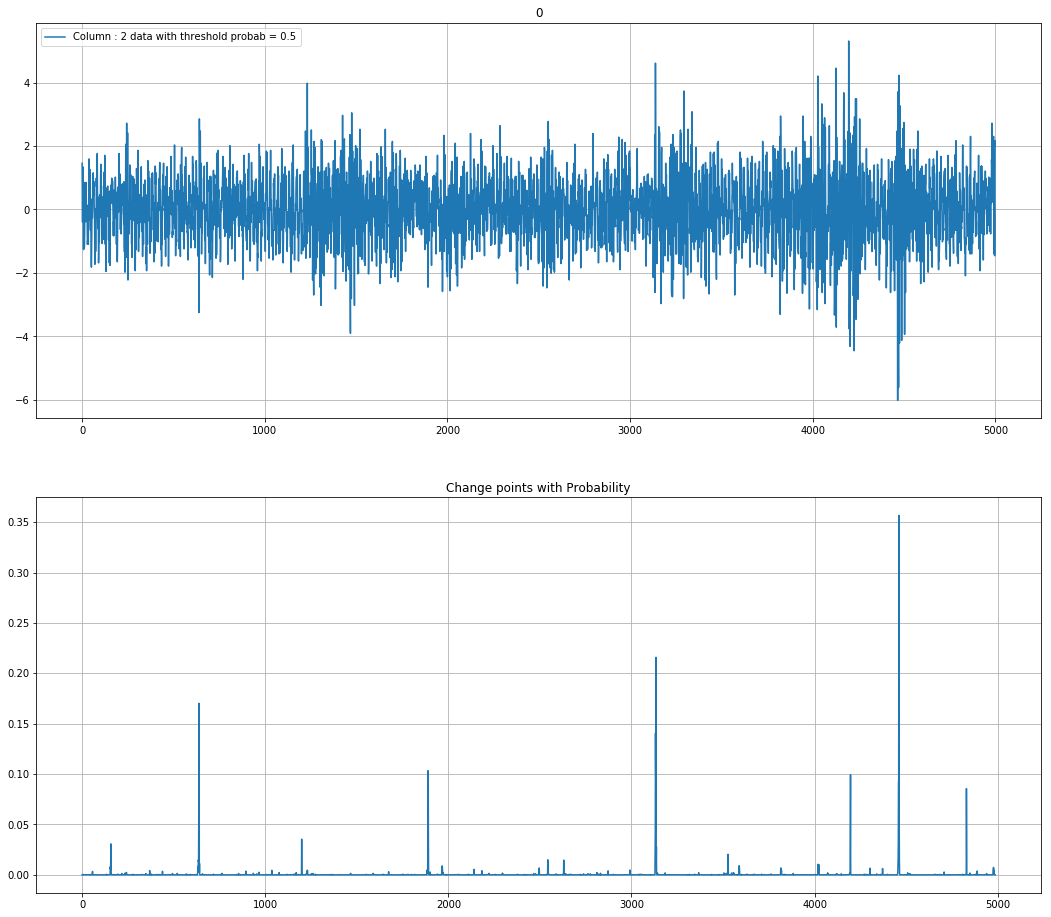


 No of Anomalies detected = 0
Postgres writer initialised 


No anomaly detected to write

{'code': '200', 'status': 'OK'}
5.79 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [33]:
%%timeit -n 1 -r 1
kwargs1 = get_csv_kwargs(infile='./dataset/bearings_1.csv',filename='bearings_1.csv',n_rows=5000,has_time=False)
kwargs1['expected_run_length']= 10000
res = bayeschangept.call(**kwargs1)
print(res)

## Test 6:
#### Testing Asset Timeline Logging :

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)
Overview of first five rows of dataset : 


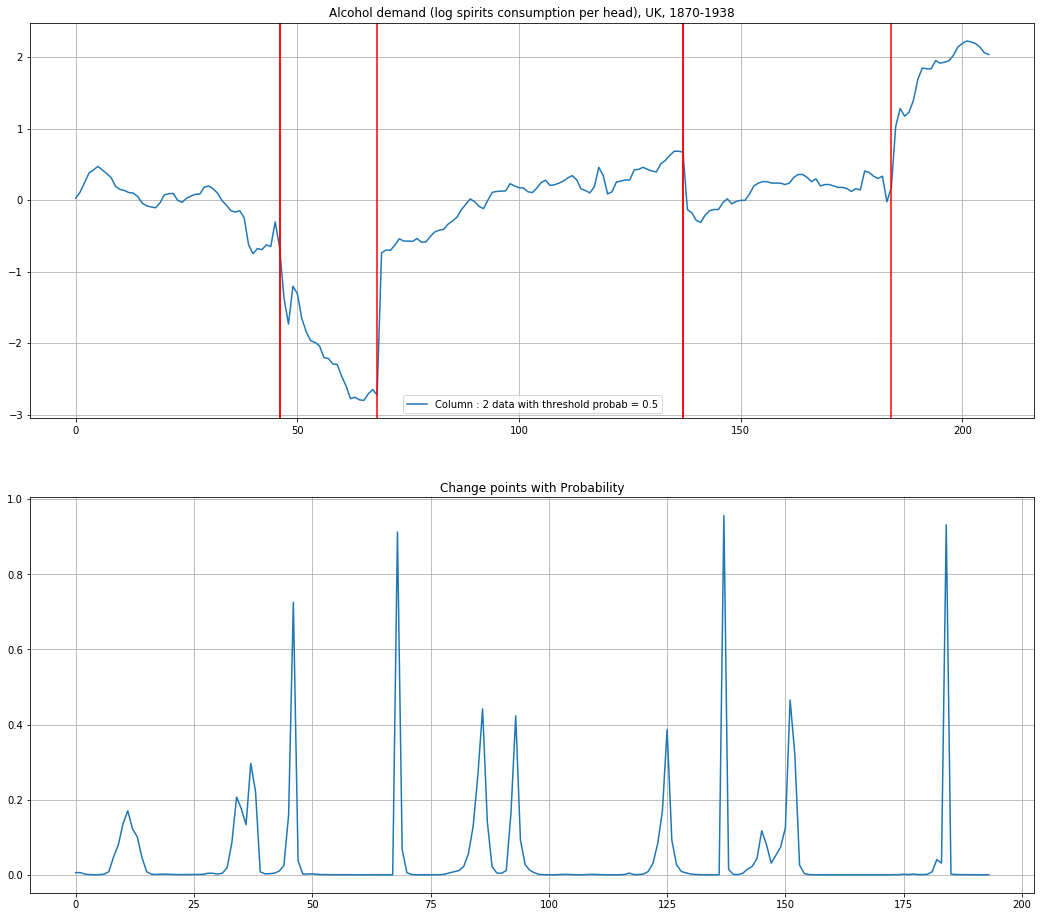


 No of Anomalies detected = 6
Postgres writer initialised 


 Successfully written into database

{'code': '200', 'status': 'OK'}


In [17]:
kwargs1 = get_csv_kwargs()
res = bayeschangept.call(**kwargs1)
print(res)

!['Asset timeline logging 1'](./atl_test2_bayes.png)
!['Asset timeline logging 2](./atl_test3_bayes.png)

## Test 7:
#### Testing the response from program to follow agreed upon template :

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)
Overview of first five rows of dataset : 


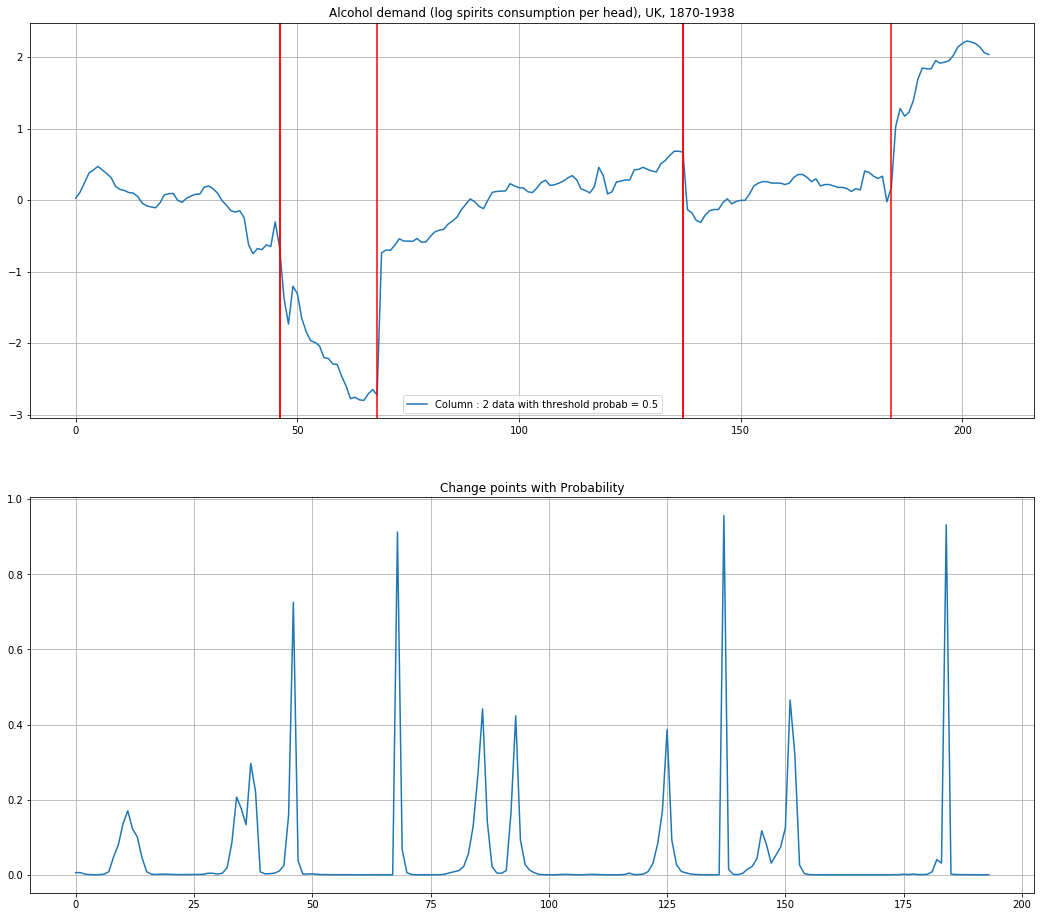


 No of Anomalies detected = 6
Postgres writer initialised 


 Successfully written into database

{'code': '200', 'status': 'OK'}


In [18]:
kwargs1 = get_csv_kwargs()
res = bayeschangept.call(**kwargs1)
print(res)

## Test 8:
#### Testing No Data exception :
* To get empty dataframe we set from and to timestamp to be not in range of the timestamps in dataset analysed

In [19]:
kwargs1 = get_csv_kwargs()
kwargs1['from_timestamp'] = int(2**60)
kwargs1['to_timestamp'] = int(2**63)
res = bayeschangept.call(**kwargs1)
print(res)

Data reader initialised 

{'code': '404', 'status': 'Not Found', 'message': 'Empty DataFrame!'}


## Test 9:
#### Testing Database connectivity  exception :
* To test this we edit the db properties and run the algo

In [20]:
import db_properties as db_properties
import writer_configs as writer_configs

In [21]:
writer_configs.table_name = 'f'

In [22]:
db_properties.db_connection

{'dbname': 'Cerebra',
 'host': '127.0.0.1',
 'password': 'givemeachance',
 'port': '5432',
 'user': 'postgres'}

### We change the db name and we expect a database error as shown below

In [23]:
db_properties.db_connection['dbname'] = 'eg'

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)
Overview of first five rows of dataset : 


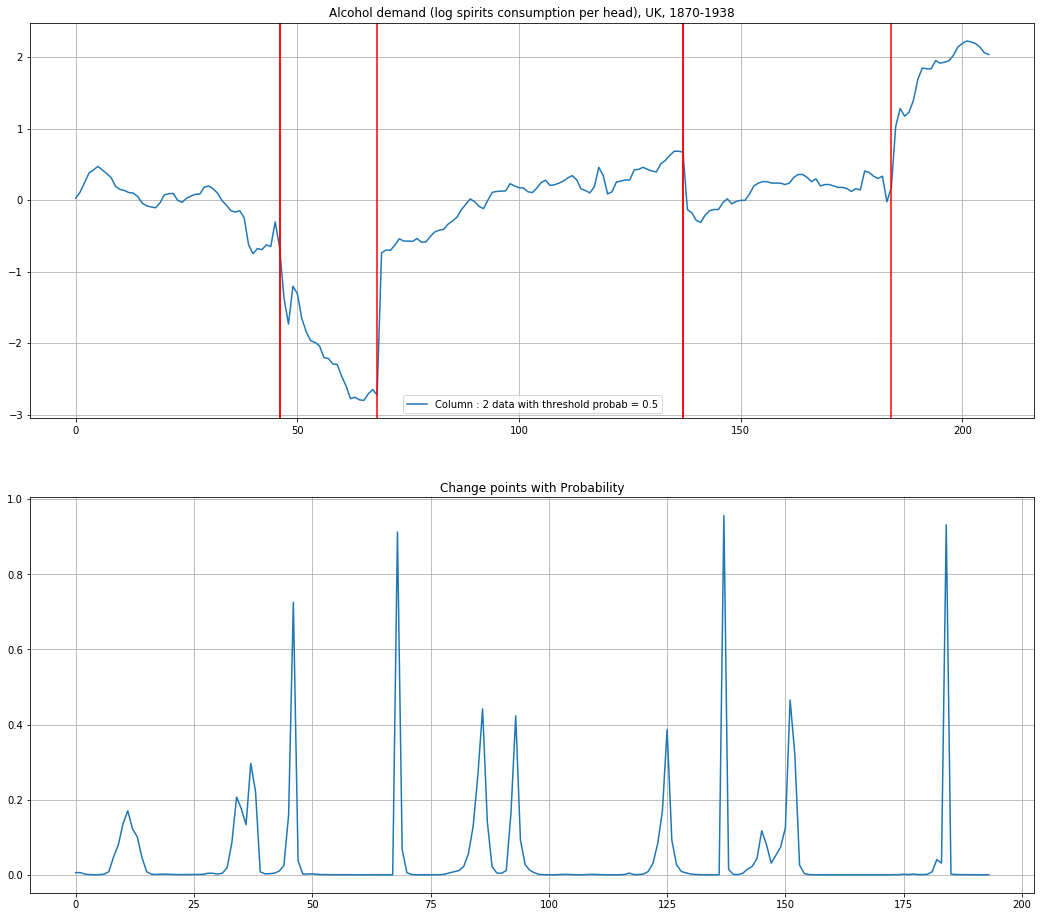


 No of Anomalies detected = 6
Postgres writer initialised 

Database error : FATAL:  database "eg" does not exist

{'code': '441', 'status': 'Database error', 'message': 'FATAL:  database "eg" does not exist\n'}


In [24]:
kwargs1 = get_csv_kwargs()
res = bayeschangept.call(**kwargs1)
print(res)

### Now we try to change the password of db properties and observe the exception handled

In [25]:
db_properties.db_connection['password']='fef'

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)
Overview of first five rows of dataset : 


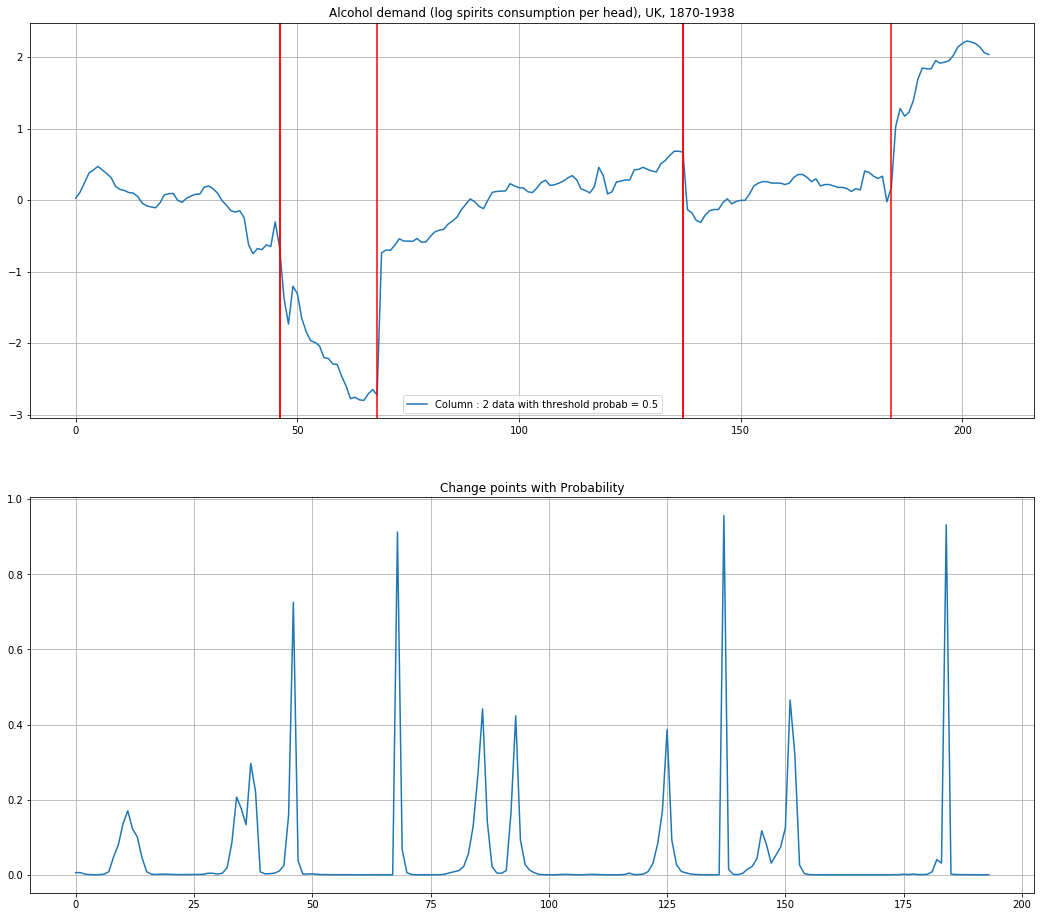


 No of Anomalies detected = 6
Postgres writer initialised 

Database error : FATAL:  password authentication failed for user "postgres"

{'code': '441', 'status': 'Database error', 'message': 'FATAL:  password authentication failed for user "postgres"\n'}


In [26]:
kwargs1 = get_csv_kwargs()
res = bayeschangept.call(**kwargs1)
print(res)

In [27]:
%%writefile_run db_properties.py

db_connection = {'dbname': 'Cerebra',
 'host': '127.0.0.1',
 'password': 'givemeachance',
 'port': '5432',
 'user': 'postgres'}

### Now we change the table name in which we are writing, and we observe that relation doesn't exist as seen below

In [28]:
writer_configs.table_name = 'ffee'

In [29]:
kwargs1 = get_csv_kwargs()
kwargs1['to_plot'] = False
res = bayeschangept.call(**kwargs1)
print(res)

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)
Overview of first five rows of dataset : 

 No of Anomalies detected = 6
Postgres writer initialised 

Database error : relation "ffee" does not exist
LINE 1:  INSERT INTO ffee (operating_unit_serial_number,event_type,e...
                     ^

{'code': '441', 'status': 'Database error', 'message': 'relation "ffee" does not exist\nLINE 1:  INSERT INTO ffee (operating_unit_serial_number,event_type,e...\n                     ^\n'}


In [30]:
writer_configs.table_name = 'public.log_asset_timeline'

## Test 10:
#### Testing random exceptions :

In [31]:
kwargs1 = get_csv_kwargs()
kwargs1['to_plot'] = False
res = bayeschangept.call(**kwargs1)

print(res)

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)
Overview of first five rows of dataset : 

 No of Anomalies detected = 6
Postgres writer initialised 


 Successfully written into database

{'code': '200', 'status': 'OK'}


## Test 11:
#### Testing High Performance :

In [32]:
%%timeit -n 1 -r 1
kwargs1 = get_csv_kwargs(infile='./dataset/bearings_1.csv',filename='bearings_1.csv',n_rows=15000,has_time=False)
kwargs1['to_plot'] = False
res = bayeschangept.call(**kwargs1)
print(res)

                  timestamp      0 assetno
0 1970-08-07 08:30:00-04:00  0.032       1
1 1970-08-07 08:40:00-04:00 -0.071       1
2 1970-08-07 08:50:00-04:00 -0.132       1
3 1970-08-07 09:00:00-04:00 -0.129       1
4 1970-08-07 09:10:00-04:00  0.022       1
Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : 1 , Metric : 0
 
Shape of the dataset : 
(15000, 2)
Overview of first five rows of dataset : 

 No of Anomalies detected = 10
Postgres writer initialised 


 Successfully written into database

{'code': '200', 'status': 'OK'}
1min 6s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


####  We observe that for running oddly $5000$ datapoints for $8$ metric names it takes around $4$ minutes $3$ seconds to run.
* I believe that reason for this timing is the algo computes the matrix of order of $NxN$ where $N$ is the size of dataset.
* So it takes lot of time to compute that

# Conclusion:
* Hence we observe that **Bayesian Changepoint Detection** works well only on level shifts or variational shift datasets over outlier or surge,sag datasets